In [122]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [139]:
with open("simulation/mutations.fa", "w") as f:
    f.write(">chr1\n")
    f.write(mutation)

In [129]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)

In [130]:
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]
mut_ratio = (F2_genotype == F2_genotype.iloc[0, :]).sum().values
print(list(mut_ratio).index(mut_ratio.max()))
mut_ind = list(mut_ratio).index(mut_ratio.max())
mut_ratio[list(mut_ratio).index(mut_ratio.max())]

19


66

In [131]:
with open("Cultivar.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [136]:
with open("F2_genome.fa", "w") as f:
    for i, key in enumerate((F2_genotype.iloc[1:, mut_ind] != F2_genotype.iloc[0, mut_ind]).values):
        if key:
            f.write(f">sample{i}\n")
            f.write(F2_seq[i])
            f.write("\n")

In [137]:
np.sort(mutate_positions)[mut_ind]

4369

In [ ]:
300 de wgsim -d 10 -1 20 -2 20 -N 150 CultivarB.fa Mutated_Cultivar_read.fastq Mutated_Cultivar_read2.fastq
3000   wgsim -d 100 -1 150 -2 150 -N 1500 F2_genome.fa bulked_1.fastq bulked_2.fastq

In [142]:
def simulate_fastq(F2_num):
    with open("genome/CultivarB.fa", mode="r") as f:
        ref = f.readlines()[1]
    with open("simulation/mutations.fa", mode="r") as f:
        mut = f.readlines()[1]

    F2_genotype = [list(reference)]
    F2_seq = []
    for i in range(F2_num):
        recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
        if random.randint(0, 9999) > 5000:
            new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
            reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
            reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
        else:
            new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
            mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
            mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
        F2_genotype.append(list(new_geno))
        F2_seq.append(new_geno)
        
        F2_genotype = pd.DataFrame(F2_genotype)
        F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != F2_num+1]
        
        with open("F2_genome.fa", "w") as f:
            for i, key in enumerate((F2_genotype.iloc[1:, 19] != F2_genotype.iloc[0, 19]).values):
                if key:
                    f.write(f">sample{i}\n")
                    f.write(F2_seq[i])
                    f.write("\n")

# QTLseq

(array([ 1.,  0.,  3.,  3.,  7.,  6.,  9., 13.,  4.,  4.]),
 array([-20.40612298, -17.26742603, -14.12872909, -10.99003214,
         -7.85133519,  -4.71263825,  -1.5739413 ,   1.56475564,
          4.70345259,   7.84214953,  10.98084648]),
 <BarContainer object of 10 artists>)

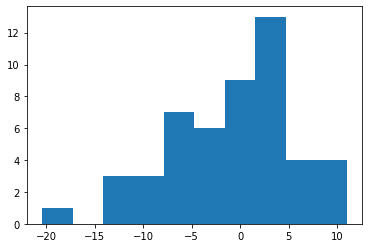

In [555]:
import numpy as np
import matplotlib.pyplot as plt

mu = 0
sigma = 7
n_sample = 50
effects = np.random.normal(mu, sigma, n_sample)
plt.hist(effects)

In [549]:
# effects[8] = -30
effects[13] = 70
# effects = effects+1
effects
# -1.37204775e+01
# 1.30497216e+01

array([ 9.99367820e+00,  2.12457977e+00, -2.91877998e+00, -5.48626626e+00,
        8.44311548e-01,  6.11133972e+00, -9.44402759e+00, -1.19276477e+01,
        1.51704245e+01,  7.42397223e+00, -5.02519919e-01, -3.33054484e+00,
       -1.15172112e+01,  7.00000000e+01, -1.10192347e-01, -6.79790677e-02,
       -7.62758730e-01, -5.65393954e+00, -7.71534894e+00,  1.82867623e+00,
       -7.77998016e+00, -4.46494483e+00,  1.03550925e+01, -9.08765145e+00,
        1.95372786e+00, -4.60478223e+00, -1.22502812e+01, -2.21559183e+00,
       -8.59646755e-01,  3.56498585e+00,  2.57223322e+00, -4.13554290e+00,
        3.99842257e+00, -1.47687398e-01, -9.69291009e+00,  3.03487346e+00,
       -2.80190931e+00, -8.71563578e+00, -2.17615497e+00,  1.39335951e+00,
        1.81077063e+00,  1.05794190e+00,  1.33980419e+01,  5.93879948e+00,
       -1.46355081e+00,  1.49562045e+00,  1.49456085e+01,  1.30913273e+01,
       -7.93802756e+00,  1.22612568e+00])

In [550]:
print(np.sort(mutate_positions)[8])
print(np.sort(mutate_positions)[13])

1870
2313


In [425]:
import numpy as np
import pandas as pd
import random
import copy

enki = ["A", "T", "G", "C"]

ref_list = random.choices(enki, k=10000)
reference = "".join(ref_list)
mutation = copy.copy(ref_list)

mutate_positions = [random.randint(0, 9999) for i in range(50)]
for pos in mutate_positions:
    ori = mutation[pos]
    if ori == "A":
        mutation[pos] = "T"
    elif ori == "T":
        mutation[pos] = "G"
    elif ori == "G":
        mutation[pos] = "C"
    elif ori == "C":
        mutation[pos] = "A"

mutation = "".join(mutation)

In [426]:
with open("genome2/CultivarB.fa", "w") as f:
    f.write(">chr1\n")
    f.write(reference)

In [551]:
F2_genotype = [list(reference)]
F2_seq = []
F2_num = 100
for i in range(F2_num):
    recom_points = np.sort([random.randint(0, 9999) for i in range(10)])
    if random.randint(0, 9999) > 5000:
        new_geno = reference[:recom_points[0]]+mutation[recom_points[0]:recom_points[1]]+reference[recom_points[1]:recom_points[2]]+mutation[recom_points[2]:recom_points[3]]+\
        reference[recom_points[3]:recom_points[4]]+mutation[recom_points[4]:recom_points[5]]+reference[recom_points[5]:recom_points[6]]+mutation[recom_points[6]:recom_points[7]]+\
        reference[recom_points[7]:recom_points[8]]+mutation[recom_points[8]:recom_points[9]]+reference[recom_points[9]:]
    else:
        new_geno = mutation[:recom_points[0]]+reference[recom_points[0]:recom_points[1]]+mutation[recom_points[1]:recom_points[2]]+reference[recom_points[2]:recom_points[3]]+\
        mutation[recom_points[3]:recom_points[4]]+reference[recom_points[4]:recom_points[5]]+mutation[recom_points[5]:recom_points[6]]+reference[recom_points[6]:recom_points[7]]+\
        mutation[recom_points[7]:recom_points[8]]+reference[recom_points[8]:recom_points[9]]+mutation[recom_points[9]:]
    F2_genotype.append(list(new_geno))
    F2_seq.append(new_geno)
F2_genotype = pd.DataFrame(F2_genotype)
F2_genotype = F2_genotype.loc[:, (F2_genotype == F2_genotype.iloc[0, :]).sum() != 101]

(array([ 2.,  2.,  2.,  3.,  2.,  6.,  8.,  6.,  5.,  6.,  8.,  7., 11.,
        10.,  7.,  5.,  4.,  2.,  3.,  1.]),
 array([ 50.20858225,  58.09481431,  65.98104638,  73.86727845,
         81.75351052,  89.63974259,  97.52597466, 105.41220673,
        113.2984388 , 121.18467087, 129.07090294, 136.95713501,
        144.84336708, 152.72959915, 160.61583122, 168.50206329,
        176.38829536, 184.27452743, 192.1607595 , 200.04699157,
        207.93322364]),
 <BarContainer object of 20 artists>)

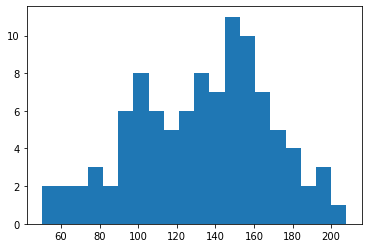

In [552]:
F2_genotype_TF = F2_genotype != F2_genotype.iloc[0, :]
phenotypes = []
for i in range(F2_num):
    phenotypes.append(100 + sum(effects[F2_genotype_TF.iloc[i+1, :].values]))
plt.hist(phenotypes, bins=20)

In [553]:
with open("low_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[:10]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")
        
with open("high_10_F2_genome.fa", "w") as f:
    for i in np.argsort(phenotypes)[-10:]:
        f.write(f">sample{i}\n")
        f.write(F2_seq[i])
        f.write("\n")

In [554]:
import os
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 low_10_F2_genome.fa reads2/low_bulked_read1.fastq reads2/low_bulked_read2.fastq')
os.system(f'wgsim -e 0 -r 0 -R 0 -X 0 -d 300 -1 150 -2 150 -N 500 high_10_F2_genome.fa reads2/high_bulked_read1.fastq reads2/high_bulked_read2.fastq')

0